In [1]:
import pandas as pd
import numpy as np
import pickle

import altair as alt


# importing local libraries for drawings (because they clutter)
# in Github, you can search  
#   They should still be available within the git repo but it's pretty much template stuff from altair
import sys
sys.path.append('../')
from lib.builders import people,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
culture = c.Culture()
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [3]:
world.culture = culture

#### Blank world from the `landscape` age

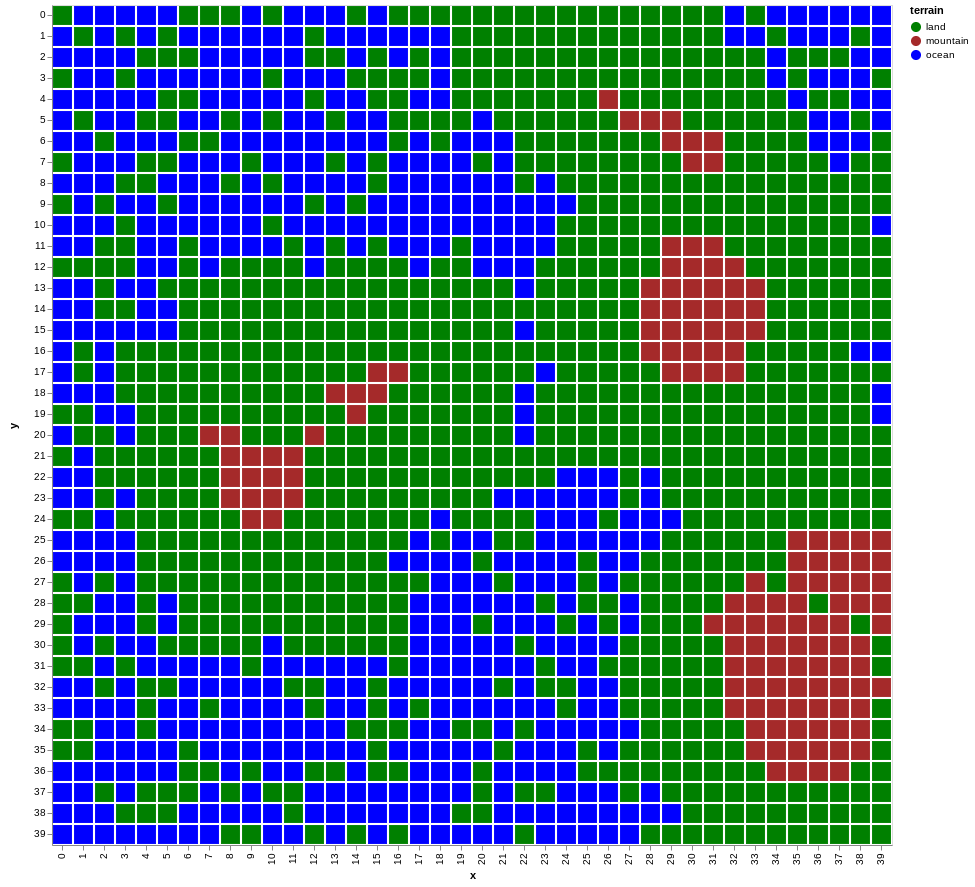

In [4]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

## People
A `Person` is a required parameter for many things like `towns`, `nations` and `buildings`

A person requires a `culture` to specify how the names will be generated. As a default the person is a `peon` and exists nowhere (`None`). Optional parameters allow the person to be created with a `role` and a `location`. `Location` can be a `town`, `building` or a `key` where the person can be found. 

In [5]:
people.Person(world.culture,location=world.get_random_chord())

Ultallech, peon, residing in [27 29]

When a new `Town` is created it is created with a person

In [6]:
new_town = towns.Town(world.get_random_chord(),1,culture,people)
new_town

town of Iceforth: population: 1 location: [18,38] founded 1

In [7]:
new_town.speaker

Thawoch, Speaker of Iceforth, residing in Iceforth

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [8]:
all_towns = towns.build_towns(world,people)
all_towns

[town of Helltear: population: 7 location: [31,23] founded 0,
 town of Tearcombe: population: 5 location: [28,30] founded 0,
 town of Fallwish: population: 2 location: [15,27] founded 0,
 town of Artcombe: population: 5 location: [28,32] founded 1,
 town of Leafhollow: population: 5 location: [22,34] founded 2,
 town of Fenhenge: population: 2 location: [34,29] founded 2,
 town of Warchild: population: 3 location: [2,12] founded 2,
 town of King'sspring: population: 5 location: [36,24] founded 3,
 town of Clearmelt: population: 2 location: [10,15] founded 3,
 town of Clearhollow: population: 3 location: [35,9] founded 3,
 town of Lioncombe: population: 4 location: [3,1] founded 4,
 town of Fairpike: population: 5 location: [30,35] founded 4,
 town of Flamerail: population: 1 location: [36,18] founded 4,
 town of Fencatch: population: 2 location: [4,22] founded 5,
 town of Snakerail: population: 1 location: [32,26] founded 5,
 town of Malborourgh: population: 3 location: [27,8] founded 

In [9]:
[p.speaker for p in all_towns]

[Brockrnan, Speaker of Helltear, residing in Helltear,
 Shopeltottle, Speaker of Tearcombe, residing in Tearcombe,
 Brosalkof, Speaker of Fallwish, residing in Fallwish,
 Irarushaker, Speaker of Artcombe, residing in Artcombe,
 Glandow, Speaker of Leafhollow, residing in Leafhollow,
 Nocklil, Speaker of Fenhenge, residing in Fenhenge,
 Ollandin, Speaker of Warchild, residing in Warchild,
 Gromendadle, Speaker of King'sspring, residing in King'sspring,
 Mellow, Speaker of Clearmelt, residing in Clearmelt,
 Tizennnan, Speaker of Clearhollow, residing in Clearhollow,
 Traggark, Speaker of Lioncombe, residing in Lioncombe,
 Thecanod, Speaker of Fairpike, residing in Fairpike,
 Paggich, Speaker of Flamerail, residing in Flamerail,
 Gromattodin, Speaker of Fencatch, residing in Fencatch,
 Kifilless, Speaker of Snakerail, residing in Snakerail,
 Thepeltave, Speaker of Malborourgh, residing in Malborourgh,
 Dechunder, Speaker of Lionspring, residing in Lionspring,
 Anikrath, Speaker of Stenchh

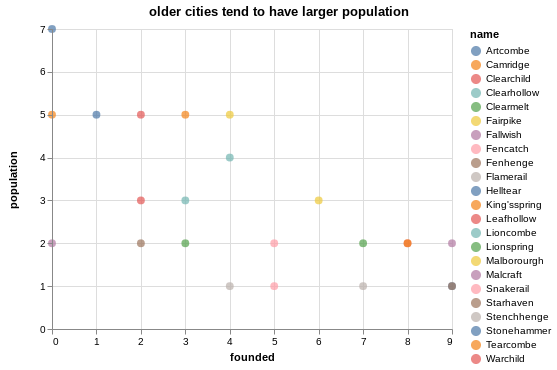

In [10]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [11]:
towns.get_town(all_towns,all_towns[2].name)

town of Fallwish: population: 2 location: [15,27] founded 0

In [12]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,7.0,0,0:0,1.0,land
1:0,0,6.0,1,1:0,-1.0,ocean
2:0,0,7.0,2,2:0,-1.0,ocean
3:0,0,12.0,3,3:0,0.0,ocean
4:0,0,11.0,4,4:0,0.0,ocean


In [13]:
world.add_features(all_towns)

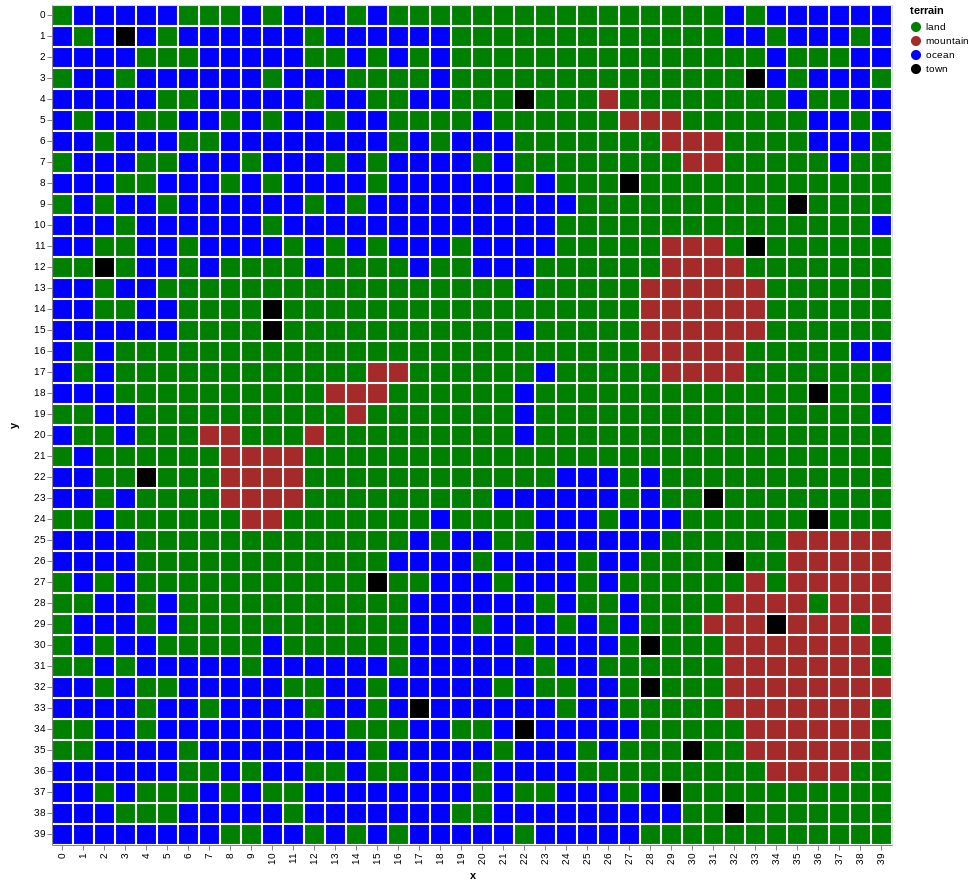

In [14]:
draw.drawCities(world.df_features)

In [15]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
3:1,1,7.0,3,3:1,1.0,town,Lioncombe
33:3,3,26.0,33,33:3,2.0,town,Stonehammer
22:4,4,13.0,22,22:4,8.0,town,Clearchild
27:8,8,23.0,27,27:8,11.0,town,Malborourgh
35:9,9,8.0,35,35:9,5.0,town,Clearhollow
33:11,11,23.0,33,33:11,21.0,town,Starhaven
2:12,12,16.0,2,2:12,1.0,town,Warchild
10:14,14,50.0,10,10:14,6.0,town,Camridge
10:15,15,37.0,10,10:15,5.0,town,Clearmelt


In [16]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Rockjaw',
 1: 'Helllight',
 2: 'Stoneborourgh',
 3: "Servant'schild",
 4: 'Godtear',
 5: 'Brinemain',
 6: 'Ravenhaven',
 7: 'Spinblade'}

In [17]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,7.0,0,0:0,1.0,land,NaN,4.0,Godtear
1:0,0,6.0,1,1:0,-1.0,ocean,NaN,NaN,NaN
2:0,0,7.0,2,2:0,-1.0,ocean,NaN,NaN,NaN
3:0,0,12.0,3,3:0,0.0,ocean,NaN,NaN,NaN
4:0,0,11.0,4,4:0,0.0,ocean,NaN,NaN,NaN
5:0,0,11.0,5,5:0,0.0,ocean,NaN,NaN,NaN
6:0,0,11.0,6,6:0,1.0,land,NaN,4.0,Godtear
7:0,0,12.0,7,7:0,1.0,land,NaN,4.0,Godtear
8:0,0,18.0,8,8:0,1.0,land,NaN,4.0,Godtear


In [19]:
world.towns

In [20]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Tearcombe is loyal to the nation of Servant'schild
{'nation': "Servant'schild", 'national fealty': 1}


In [21]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Helltear: population: 7 location: [31,23] founded 0,
 capitol of Tearcombe: population: 5 location: [28,30] founded 0,
 town of Fallwish: population: 2 location: [15,27] founded 0,
 town of Artcombe: population: 5 location: [28,32] founded 1,
 capitol of Leafhollow: population: 5 location: [22,34] founded 2,
 town of Fenhenge: population: 2 location: [34,29] founded 2,
 capitol of Warchild: population: 3 location: [2,12] founded 2,
 town of King'sspring: population: 5 location: [36,24] founded 3,
 town of Clearmelt: population: 2 location: [10,15] founded 3,
 capitol of Clearhollow: population: 3 location: [35,9] founded 3,
 capitol of Lioncombe: population: 4 location: [3,1] founded 4,
 town of Fairpike: population: 5 location: [30,35] founded 4,
 town of Flamerail: population: 1 location: [36,18] founded 4,
 capitol of Fencatch: population: 2 location: [4,22] founded 5,
 town of Snakerail: population: 1 location: [32,26] founded 5,
 capitol of Malborourgh: population: 3 l

In [22]:
world.nations = [nations.Nation(n,world,world.culture,people) for n in world.nations.values()]
world.nations

[Nation of Rockjaw,
 Nation of Helllight,
 Nation of Stoneborourgh,
 Nation of Servant'schild,
 Nation of Godtear,
 Nation of Brinemain,
 Nation of Ravenhaven,
 Nation of Spinblade]

In [23]:
world.nations[0].ruler

Remendesh, Ruler of the nation of Rockjaw, residing in Fencatch

In [24]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
10:15,15,37.0,10,10:15,5.0,town,Clearmelt,5.0,Brinemain
2:12,12,16.0,2,2:12,1.0,town,Warchild,5.0,Brinemain
10:14,14,50.0,10,10:14,6.0,town,Camridge,5.0,Brinemain
3:1,1,7.0,3,3:1,1.0,town,Lioncombe,4.0,Godtear
34:29,29,30.0,34,34:29,30.0,town,Fenhenge,1.0,Helllight
32:26,26,18.0,32,32:26,18.0,town,Snakerail,1.0,Helllight
36:24,24,20.0,36,36:24,20.0,town,King'sspring,1.0,Helllight
36:18,18,2.0,36,36:18,2.0,town,Flamerail,1.0,Helllight
31:23,23,3.0,31,31:23,3.0,town,Helltear,1.0,Helllight


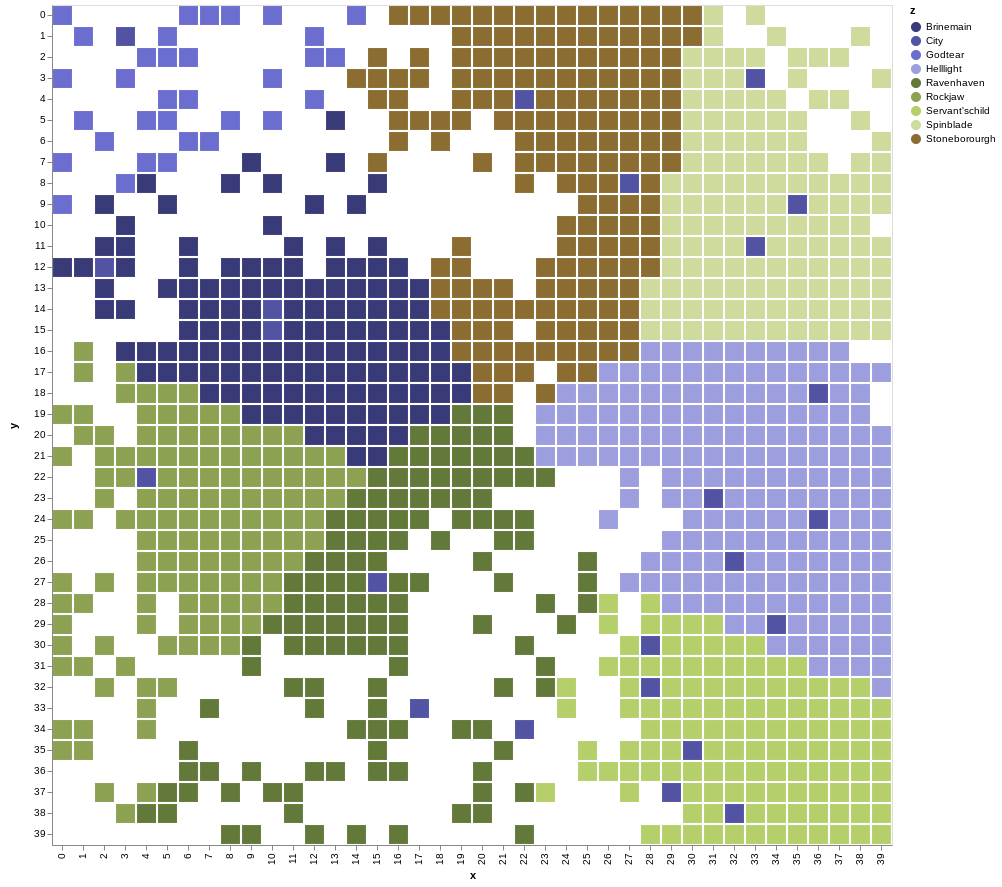

In [25]:
draw.drawboarders(world.df_features)

In [26]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)